# Insurance dataset EDA + Modeling

In [80]:
import numpy as npa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('medical_insurance.csv')

In [61]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [62]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [64]:
df = df.rename(columns = {'sex' : 'gender'})

In [65]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [66]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [1]:
# Label encoding categorical columns

from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

df = pd.get_dummies(df, columns = ['gender'])

df['gender_female'] = encode.fit_transform(df['gender_female'])
df['gender_male'] = encode.fit_transform(df['gender_male'])

df = pd.get_dummies(df, columns = ['smoker'])

df['smoker_yes'] = encode.fit_transform(df['smoker_yes'])
df['smoker_no'] = encode.fit_transform(df['smoker_no'])

df = pd.get_dummies(df, columns = ['region'])

df['region_southwest'] = encode.fit_transform(df['region_southwest'])
df['region_southeast'] = encode.fit_transform(df['region_southeast'])
df['region_northwest'] = encode.fit_transform(df['region_northwest'])
df['region_northeast'] = encode.fit_transform(df['region_northeast'])

NameError: name 'pd' is not defined

In [68]:
df

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,1,0,1,0,0,0,1,0
2768,21,34.600,0,2020.17700,1,0,1,0,0,0,0,1
2769,19,26.030,1,16450.89470,0,1,0,1,0,1,0,0
2770,23,18.715,0,21595.38229,0,1,1,0,0,1,0,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2772 non-null   int64  
 1   bmi               2772 non-null   float64
 2   children          2772 non-null   int64  
 3   charges           2772 non-null   float64
 4   gender_female     2772 non-null   int64  
 5   gender_male       2772 non-null   int64  
 6   smoker_no         2772 non-null   int64  
 7   smoker_yes        2772 non-null   int64  
 8   region_northeast  2772 non-null   int64  
 9   region_northwest  2772 non-null   int64  
 10  region_southeast  2772 non-null   int64  
 11  region_southwest  2772 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 260.0 KB


In [78]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'gender_female', 'gender_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

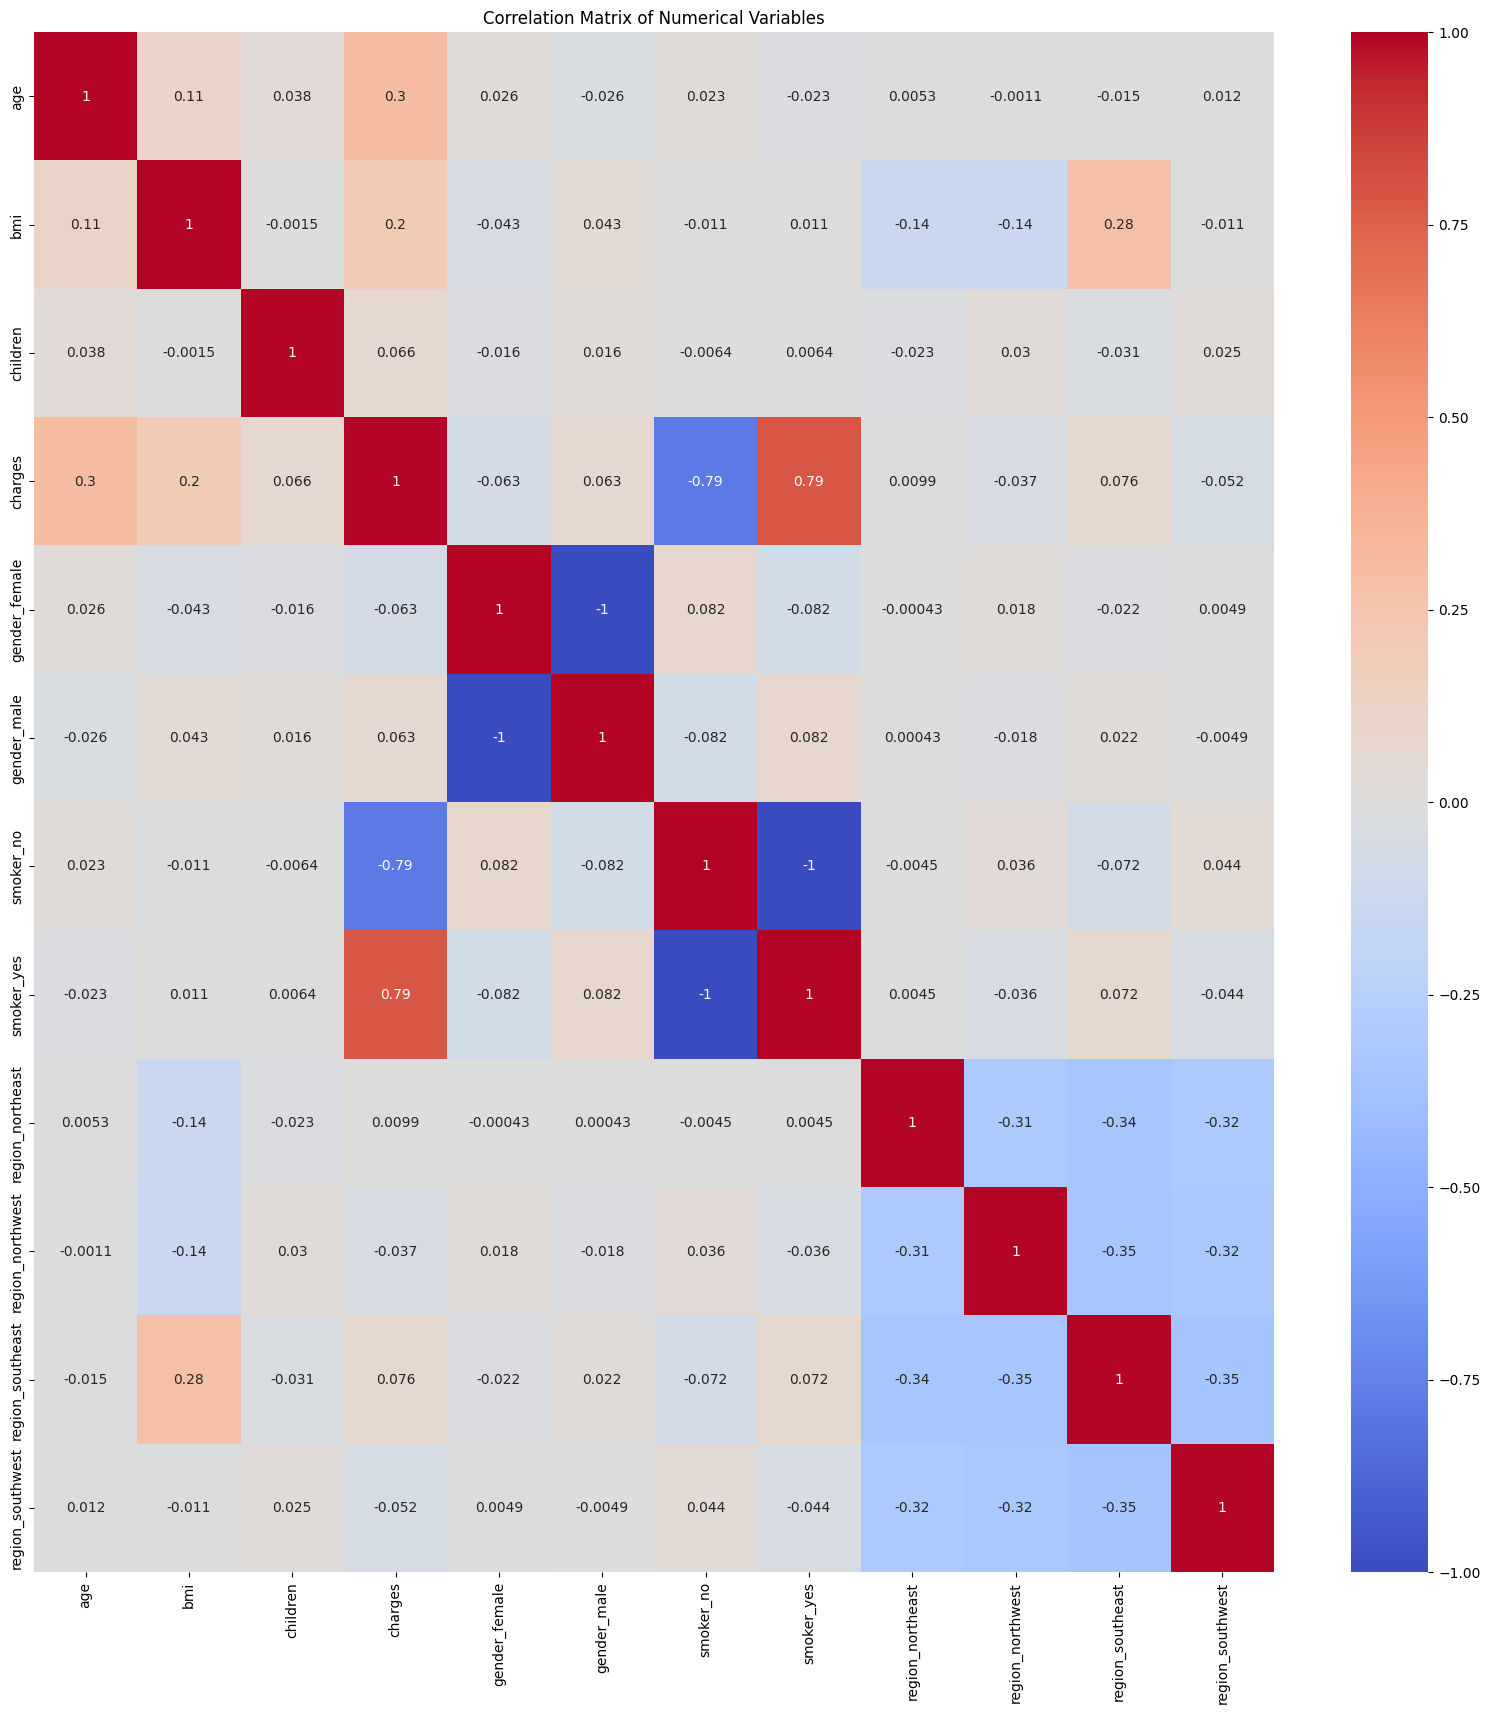

In [87]:
# Corel

num_cols = ['age', 'bmi', 'children', 'charges', 'gender_female', 'gender_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']

corr_matrix = df[num_cols].corr()

plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [88]:
X = df.drop(['charges'], axis = 1)
y = df[['charges']]

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [96]:
print("Shapes")
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

Shapes
X_train (1940, 11)
X_test (832, 11)
y_train (1940, 1)
y_test (832, 1)


# Models

In [97]:
# Linear regression

In [102]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(X_train, y_train)

In [116]:
pred_test = model.predict(X_test)

In [117]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("Evaulation of train data")

Mean_error = mean_squared_error(pred_test,y_test)
print( "mean=" , round(Mean_error,3))

import math
RMSE = math.sqrt(Mean_error)
print( "RMSE= ", round(RMSE,3))

MAE = mean_absolute_error(y_test,pred_test)
print("Mean absolute error=", round(MAE,4))

MAPE = mean_absolute_percentage_error(y_test,pred_test)
print("Mean Absolute Percentage Error=",round(MAPE,4))

R_square_train = r2_score(y_test,pred_test)
print( "R_squared=" , round(R_square_train,3))

Evaulation of train data
mean= 32902666.603
RMSE=  5736.085
Mean absolute error= 4021.1695
Mean Absolute Percentage Error= 0.4035
R_squared= 0.774


In [118]:
# Decision tree

In [121]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt_model = dt.fit(X_train, y_train)

In [122]:
pred_test = dt_model.predict(X_test)

In [123]:
print("Evaulation of train data")

Mean_error = mean_squared_error(pred_test,y_test)
print( "mean=" , round(Mean_error,3))

import math
RMSE = math.sqrt(Mean_error)
print( "RMSE= ", round(RMSE,3))

MAE = mean_absolute_error(y_test,pred_test)
print("Mean absolute error=", round(MAE,4))

MAPE = mean_absolute_percentage_error(y_test,pred_test)
print("Mean Absolute Percentage Error=",round(MAPE,4))

R_square_train = r2_score(y_test,pred_test)
print( "R_squared=" , round(R_square_train,3))

Evaulation of train data
mean= 10376688.547
RMSE=  3221.287
Mean absolute error= 740.4097
Mean Absolute Percentage Error= 0.1373
R_squared= 0.929


In [124]:
pred_train = dt_model.predict(X_train)

In [125]:
print("Evaulation of train data")

Mean_error = mean_squared_error(pred_train,y_train)
print( "mean=" , round(Mean_error,3))

import math
RMSE = math.sqrt(Mean_error)
print( "RMSE= ", round(RMSE,3))

MAE = mean_absolute_error(y_train,pred_train)
print("Mean absolute error=", round(MAE,4))

MAPE = mean_absolute_percentage_error(y_train,pred_train)
print("Mean Absolute Percentage Error=",round(MAPE,4))

R_square_train = r2_score(y_train,pred_train)
print( "R_squared=" , round(R_square_train,3))

Evaulation of train data
mean= 0.0
RMSE=  0.0
Mean absolute error= 0.0
Mean Absolute Percentage Error= 0.0
R_squared= 1.0


In [136]:
# Xgboost 

In [128]:
import xgboost as xgb

In [129]:
Xgr = xgb.XGBRegressor(objective = 'reg:linear', n_setimator = 10, seed = 123)

In [130]:
Xgboost = Xgr.fit(X_train,y_train)

C:\Users\Sandeep\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:36:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\Sandeep\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:36:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_setimator" } are not used.

  warnings.warn(smsg, UserWarning)


In [131]:
pred_test = Xgboost.predict(X_test)

In [132]:
pred_train = Xgboost.predict(X_train)

In [134]:
print("Evaulation of train data")

Mean_error = mean_squared_error(pred_test,y_test)
print( "mean=" , round(Mean_error,3))

import math
RMSE = math.sqrt(Mean_error)
print( "RMSE= ", round(RMSE,3))

MAE = mean_absolute_error(y_test,pred_test)
print("Mean absolute error=", round(MAE,4))

MAPE = mean_absolute_percentage_error(y_test,pred_test)
print("Mean Absolute Percentage Error=",round(MAPE,4))

R_square_test = r2_score(y_test,pred_test)
print( "R_squared=" , round(R_square_test,3))

Evaulation of train data
mean= 7725532.144
RMSE=  2779.484
Mean absolute error= 1280.4797
Mean Absolute Percentage Error= 0.2023
R_squared= 0.947


In [135]:
print("Evaulation of train data")

Mean_error = mean_squared_error(pred_train,y_train)
print( "mean=" , round(Mean_error,3))

import math
RMSE = math.sqrt(Mean_error)
print( "RMSE= ", round(RMSE,3))

MAE = mean_absolute_error(y_train,pred_train)
print("Mean absolute error=", round(MAE,4))

MAPE = mean_absolute_percentage_error(y_train,pred_train)
print("Mean Absolute Percentage Error=",round(MAPE,4))

R_square_train = r2_score(y_train,pred_train)
print( "R_squared=" , round(R_square_train,3))

Evaulation of train data
mean= 513945.121
RMSE=  716.9
Mean absolute error= 410.3248
Mean Absolute Percentage Error= 0.0611
R_squared= 0.997


In [ ]:
as




